In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/data_raw.csv')

/Users/hugorebeix/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (95,96,97,98,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,120,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(870492, 124)

In [4]:
describe = data.describe(include='all')

In [5]:
describe

,Unnamed: 0,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1971,1972,1973,1974,...,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,DESCRIPTION,Unnamed: 3
count,870492.000000,870492,870492,870492,870492,7.148000e+04,3.444300e+04,3.451400e+04,3.446700e+04,3.467500e+04,...,509292,577920,400932,512904.0,386484.000000,668220.000000,646548.0,0.0,613,0.0
unique,NaN,241,241,3612,3612,NaN,NaN,NaN,NaN,NaN,...,60,75,2,44.0,NaN,NaN,21.0,NaN,97,NaN
top,NaN,Madagascar,MRT,"Population, ages 6-10, total",LO.LLECE.MAT6.2.MA,NaN,NaN,NaN,NaN,NaN,...,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",Yes,2010.0,NaN,NaN,2005.0,NaN,Data sources : United Nations World Population...,NaN
freq,NaN,3612,3612,241,241,NaN,NaN,NaN,NaN,NaN,...,36120,54180,397320,82920.0,NaN,NaN,144480.0,NaN,154,NaN
mean,435245.500000,NaN,NaN,NaN,NaN,1.997095e+09,4.388745e+09,4.739394e+09,5.264671e+09,5.565835e+09,...,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN,NaN,NaN
std,251289.539602,NaN,NaN,NaN,NaN,1.218514e+11,1.833238e+11,1.944465e+11,2.091105e+11,2.144020e+11,...,NaN,NaN,NaN,NaN,2.604581,2.562723,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,...,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN,NaN,NaN
25%,217622.750000,NaN,NaN,NaN,NaN,8.700000e-01,1.045615e+01,1.076718e+01,1.116327e+01,1.131197e+01,...,NaN,NaN,NaN,NaN,2007.000000,2011.000000,NaN,NaN,NaN,NaN
50%,435245.500000,NaN,NaN,NaN,NaN,6.570000e+00,7.207677e+01,7.685992e+01,7.963683e+01,8.090797e+01,...,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN,NaN,NaN
75%,652868.250000,NaN,NaN,NaN,NaN,6.387674e+01,6.452600e+04,6.653125e+04,6.973650e+04,7.127600e+04,...,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN,NaN,NaN


Faisons un état des lieux du set de données non nettoyé

In [6]:
nb_rows = len(data)
nb_rows

870492

In [10]:
counts = describe.iloc[0]

In [54]:
counts = np.array(counts)
counts_freq = counts/nb_rows
xlabel1 = data.columns[:int(len(data.columns)/2)]
xlabel2 = data.columns[int(len(data.columns)/2):]
counts_freq1 = counts_freq[:int(len(data.columns)/2)]
counts_freq2 = counts_freq[int(len(data.columns)/2):]

<BarContainer object of 62 artists>

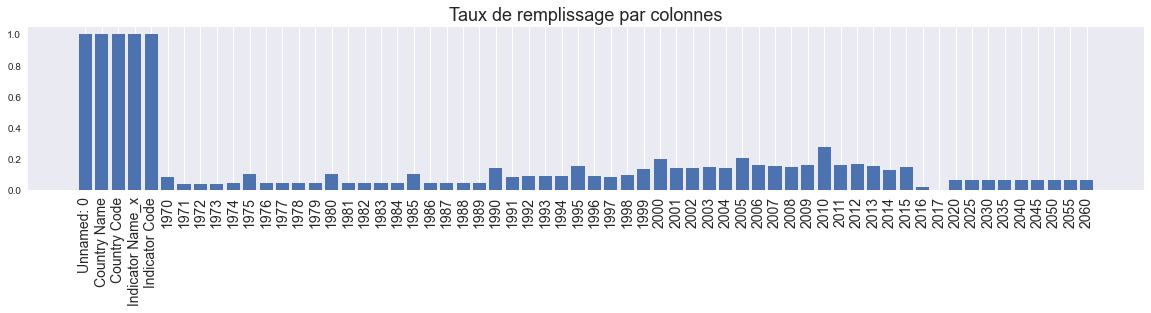

In [76]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel1, counts_freq1, align='center')

<BarContainer object of 62 artists>

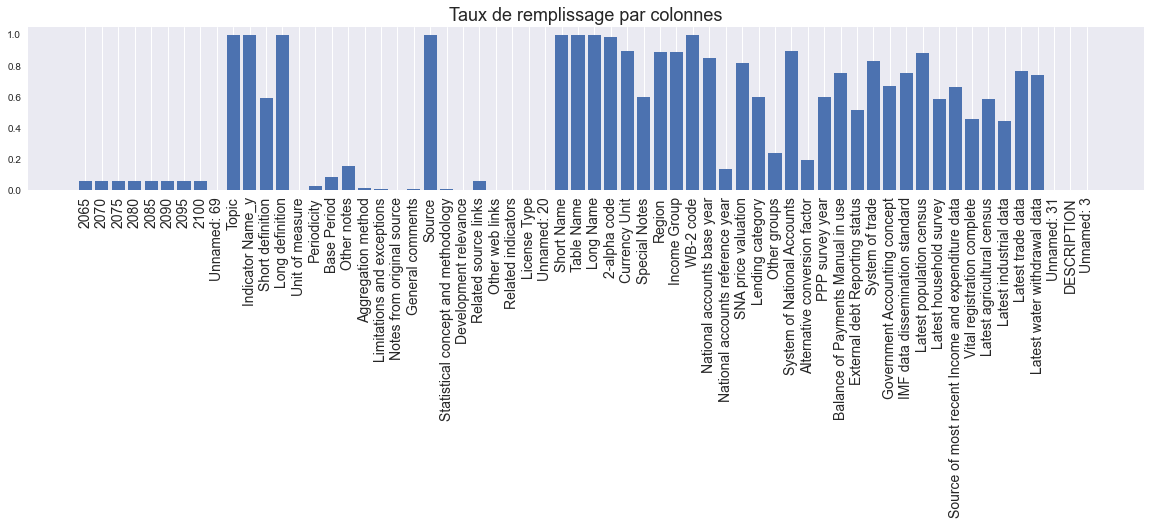

In [77]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel2, counts_freq2, align='center')

In [87]:
cells_total = data.size
filled_cells = counts.sum()
empty_cells = cells_total - filled_cells

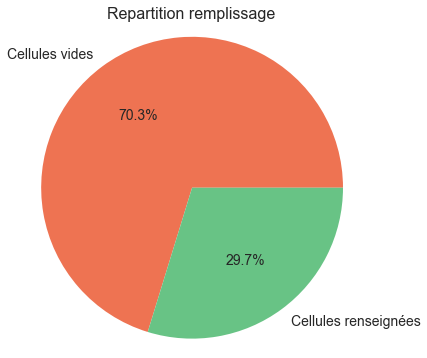

In [107]:
fig = plt.figure(figsize=(6,6))
plt.title('Repartition remplissage', fontsize=16)
plt.pie([empty_cells, filled_cells], labels=['Cellules vides', 'Cellules renseignées'], colors=['#EE7352', '#68C385'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

Retirons les colonnes vides

In [78]:
counts = describe.iloc[0]

In [79]:
counts

Unnamed: 0                      870492
Country Name                    870492
Country Code                    870492
Indicator Name_x                870492
Indicator Code                  870492
                                 ...  
Latest trade data               668220
Latest water withdrawal data    646548
Unnamed: 31                          0
DESCRIPTION                        613
Unnamed: 3                           0
Name: count, Length: 124, dtype: object

In [8]:
useless_cols = counts[counts/len(data) < 0.25]

In [9]:
useless_cols.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050',
       '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095',
       '2100', 'Unnamed: 69', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20', 'National accounts reference year',
       'Other groups

Je ne veux pas retirer les colonnes concernant les années car c'est là ou se situe la valeur ajoutée

In [10]:
useless_cols

1970                              71480
1971                              34443
1972                              34514
1973                              34467
1974                              34675
                                  ...  
Other groups                     209496
Alternative conversion factor    169764
Unnamed: 31                           0
DESCRIPTION                         613
Unnamed: 3                            0
Name: count, Length: 86, dtype: object

In [11]:
useless_cols = pd.DataFrame(useless_cols)

In [12]:
useless_cols['index'] = useless_cols.index

In [13]:
year_test = lambda name : not name.isdigit()
useless_cols = useless_cols[useless_cols['index'].map(year_test)]

In [14]:
useless_cols

,count,index
Unnamed: 69,0,Unnamed: 69
Unit of measure,0,Unit of measure
Periodicity,23859,Periodicity
Base Period,75674,Base Period
Other notes,132068,Other notes
Aggregation method,11327,Aggregation method
Limitations and exceptions,3374,Limitations and exceptions
Notes from original source,0,Notes from original source
General comments,3374,General comments
Statistical concept and methodology,5543,Statistical concept and methodology


Je pense que la colonne 'Statistical concept and methodology' peut tout de même être pertinente

In [15]:
useless_cols = useless_cols.drop(index='Statistical concept and methodology')

In [16]:
data = data.drop(columns=useless_cols.index)

In [17]:
data.shape

(870492, 103)

### Parmis les 3600 indicateurs, il faudrait selectionner ceux qui sont en relation avec notre problématique "métier".
#### On va donc établir une liste de mots clés en relation avec cette problématique.
#### On recherche des pays dont le marché est propice à un developpement de l'activité d'une plateforme d'apprentissage en ligne pour les 15 - 30 ans (en prenant large). On va donc chercher des mots clés liés à l'age, à l'accès internet, à l'éducation.

In [18]:
cols = data.columns
cols

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)

In [19]:
indicateurs = data['Indicator Name_x'].unique()

In [20]:
indicateurs[:5]

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)'],
      dtype=object)

In [21]:
key_words = ['internet', 'young', 'education',
             'access', 'age', 'diploma',
             '15', 'old', '30', 
             'enrolment', 'secondary', 'primary',
             'illiteracy', 'growth', 'professor', '']

In [22]:
indicateurs_interessants = []

for indicateur in indicateurs:
    mots = indicateur.split(' ')
    for mot in mots:
        if mot in key_words:
            indicateurs_interessants.append(indicateur)
            break # pour éviter les doublons
len(indicateurs_interessants)

1642

In [23]:
%%timeit
def test_mapper(name):
    if name in indicateurs_interessants:
        return True
    else:
        return False

data['interessant'] = data['Indicator Name_x'].map(test_mapper)

22.4 s ± 3.85 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
data_test = data[data['interessant']]

In [25]:
data_test.shape

(395722, 104)

In [26]:
data.shape

(870492, 104)

In [27]:
data = data_test.copy()

In [28]:
data = data.drop(columns=['interessant'])

In [29]:
data.shape

(395722, 103)

In [30]:
print(data.columns)

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)


Il reste encore beaucoup trop de colonnes.

In [31]:
kpi_columns = data[['Indicator Name_x', 'Indicator Name_y']]

In [32]:
kpi_columns

,Indicator Name_x,Indicator Name_y
0,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex...","Adjusted net enrolment rate, primary, both sex..."
...,...,...
870464,Wittgenstein Projection: Population age 25-29 ...,Projection: Population age 25-29 in thousands ...
870465,Wittgenstein Projection: Population age 25-29 ...,Projection: Population age 25-29 in thousands ...
870466,Wittgenstein Projection: Population age 25-29 ...,Projection: Population age 25-29 in thousands ...
870467,Wittgenstein Projection: Population age 25-29 ...,Projection: Population age 25-29 in thousands ...


In [33]:
data = data.drop(columns=['Indicator Name_y'])

In [34]:
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
870464    870464
870465    870465
870466    870466
870467    870467
870468    870468
Name: Unnamed: 0, Length: 395722, dtype: int64

c'est une copie des index

In [35]:
data = data.drop(columns=['Unnamed: 0'])

## Evaluons le contenu de chacunes des cols

In [36]:
useless_cols_manual = []

In [37]:
data.columns[69]

'Topic'

In [38]:
data.Topic

0          Secondary
1          Secondary
2          Secondary
3          Secondary
4            Primary
             ...    
870464    Attainment
870465    Attainment
870466    Attainment
870467    Attainment
870468    Attainment
Name: Topic, Length: 395722, dtype: object

In [39]:
data.Topic.unique()

array(['Secondary', 'Primary', 'Teachers', 'EMIS', 'Expenditures',
       'Attainment', 'Education Equality', 'Background', 'Tertiary',
       'Post-Secondary/Non-Tertiary', 'Pre-Primary',
       'Social Protection & Labor: Labor force structure',
       'Learning Outcomes', 'Early Childhood Education',
       'Health: Population: Dynamics', 'Population',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Teachers (SABER)'], dtype=object)

Topic est interessant

In [40]:
data.columns[70]

'Short definition'

In [41]:
data.columns[71]

'Long definition'

Je ne garde que la longue définition

In [42]:
useless_cols_manual.append(data.columns[70])

In [43]:
useless_cols_manual

['Short definition']

In [44]:
data.columns[72]

'Source'

In [45]:
data.Source

0                           UNESCO Institute for Statistics
1                           UNESCO Institute for Statistics
2                           UNESCO Institute for Statistics
3                           UNESCO Institute for Statistics
4                           UNESCO Institute for Statistics
                                ...                        
870464    Wittgenstein Centre for Demography and Global ...
870465    Wittgenstein Centre for Demography and Global ...
870466    Wittgenstein Centre for Demography and Global ...
870467    Wittgenstein Centre for Demography and Global ...
870468    Wittgenstein Centre for Demography and Global ...
Name: Source, Length: 395722, dtype: object

In [46]:
data.columns[73]

'Statistical concept and methodology'

In [47]:
data['Statistical concept and methodology']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870464    NaN
870465    NaN
870466    NaN
870467    NaN
870468    NaN
Name: Statistical concept and methodology, Length: 395722, dtype: object

In [48]:
data['Statistical concept and methodology'].unique()

array([nan], dtype=object)

In [49]:
useless_cols_manual.append(data.columns[73])

In [50]:
data.columns[74]

'Short Name'

In [51]:
data['Short Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870464      Zimbabwe
870465      Zimbabwe
870466      Zimbabwe
870467      Zimbabwe
870468      Zimbabwe
Name: Short Name, Length: 395722, dtype: object

In [52]:
data['Country Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870464      Zimbabwe
870465      Zimbabwe
870466      Zimbabwe
870467      Zimbabwe
870468      Zimbabwe
Name: Country Name, Length: 395722, dtype: object

C'est un doublon

In [53]:
useless_cols_manual.append(data.columns[74])

In [54]:
data.columns[75]

'Table Name'

In [55]:
data[data.columns[75]]

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870464      Zimbabwe
870465      Zimbabwe
870466      Zimbabwe
870467      Zimbabwe
870468      Zimbabwe
Name: Table Name, Length: 395722, dtype: object

encore un doublon 

In [56]:
useless_cols_manual.append(data.columns[75])

In [57]:
data.columns[76]

'Long Name'

In [58]:
data[data.columns[76]]

0                   Arab World
1                   Arab World
2                   Arab World
3                   Arab World
4                   Arab World
                  ...         
870464    Republic of Zimbabwe
870465    Republic of Zimbabwe
870466    Republic of Zimbabwe
870467    Republic of Zimbabwe
870468    Republic of Zimbabwe
Name: Long Name, Length: 395722, dtype: object

encore un doublon

In [59]:
useless_cols_manual.append(data.columns[76])

In [60]:
data[data.columns[77]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870464    ZW
870465    ZW
870466    ZW
870467    ZW
870468    ZW
Name: 2-alpha code, Length: 395722, dtype: object

In [61]:
useless_cols_manual.append(data.columns[77])

In [62]:
data[data.columns[78]]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
870464    U.S. dollar
870465    U.S. dollar
870466    U.S. dollar
870467    U.S. dollar
870468    U.S. dollar
Name: Currency Unit, Length: 395722, dtype: object

In [63]:
useless_cols_manual.append(data.columns[78])

In [64]:
data[data.columns[79]]

0         Arab World aggregate. Arab World is composed o...
1         Arab World aggregate. Arab World is composed o...
2         Arab World aggregate. Arab World is composed o...
3         Arab World aggregate. Arab World is composed o...
4         Arab World aggregate. Arab World is composed o...
                                ...                        
870464    Fiscal year end: June 30; reporting period for...
870465    Fiscal year end: June 30; reporting period for...
870466    Fiscal year end: June 30; reporting period for...
870467    Fiscal year end: June 30; reporting period for...
870468    Fiscal year end: June 30; reporting period for...
Name: Special Notes, Length: 395722, dtype: object

In [65]:
data[data.columns[79]][0]

'Arab World aggregate. Arab World is composed of members of the League of Arab States.'

In [66]:
data[data.columns[79]][870466]

'Fiscal year end: June 30; reporting period for national accounts data: CY. As of January 2009, multiple hard currencies, such as rand, pound sterling, euro and U.S. dollar are in use. Data are reported in U.S. dollars, the most-used currency.'

Cette colonne contient des informations à propos du pays concerné par la ligne. Je décide de la garder pour l'instant

In [67]:
data[data.columns[80]]

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
870464    Sub-Saharan Africa
870465    Sub-Saharan Africa
870466    Sub-Saharan Africa
870467    Sub-Saharan Africa
870468    Sub-Saharan Africa
Name: Region, Length: 395722, dtype: object

La région m'interesse dans l'idée de détecter des zones géographiques plus que des pays

In [68]:
data[data.columns[81]]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
870464    Low income
870465    Low income
870466    Low income
870467    Low income
870468    Low income
Name: Income Group, Length: 395722, dtype: object

In [69]:
data[data.columns[81]].unique()

array([nan, 'Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [70]:
data[data.columns[82]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870464    ZW
870465    ZW
870466    ZW
870467    ZW
870468    ZW
Name: WB-2 code, Length: 395722, dtype: object

In [71]:
useless_cols_manual.append(data.columns[82])

In [72]:
data[data.columns[83]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870464    2009
870465    2009
870466    2009
870467    2009
870468    2009
Name: National accounts base year, Length: 395722, dtype: object

In [73]:
useless_cols_manual.append(data.columns[83])

In [74]:
data[data.columns[84]]

0                                       NaN
1                                       NaN
2                                       NaN
3                                       NaN
4                                       NaN
                        ...                
870464    Value added at basic prices (VAB)
870465    Value added at basic prices (VAB)
870466    Value added at basic prices (VAB)
870467    Value added at basic prices (VAB)
870468    Value added at basic prices (VAB)
Name: SNA price valuation, Length: 395722, dtype: object

In [75]:
data[data.columns[84]].unique()

array([nan, 'Value added at basic prices (VAB)',
       'Value added at producer prices (VAP)'], dtype=object)

In [76]:
useless_cols_manual.append(data.columns[84])

In [77]:
data[data.columns[85]]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
870464    Blend
870465    Blend
870466    Blend
870467    Blend
870468    Blend
Name: Lending category, Length: 395722, dtype: object

In [78]:
data[data.columns[85]].unique()

array([nan, 'IDA', 'IBRD', 'Blend'], dtype=object)

Lending veut dire prêt. Cette donnée n'apporte rien

In [79]:
useless_cols_manual.append(data.columns[85])

In [80]:
data[data.columns[86]]

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
870464    Country uses the 1993 System of National Accou...
870465    Country uses the 1993 System of National Accou...
870466    Country uses the 1993 System of National Accou...
870467    Country uses the 1993 System of National Accou...
870468    Country uses the 1993 System of National Accou...
Name: System of National Accounts, Length: 395722, dtype: object

In [81]:
useless_cols_manual.append(data.columns[86])

In [82]:
data[data.columns[87]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870464    2005
870465    2005
870466    2005
870467    2005
870468    2005
Name: PPP survey year, Length: 395722, dtype: object

In [83]:
useless_cols_manual.append(data.columns[87])

In [84]:
data[data.columns[88]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870464    IMF Balance of Payments Manual, 6th edition.
870465    IMF Balance of Payments Manual, 6th edition.
870466    IMF Balance of Payments Manual, 6th edition.
870467    IMF Balance of Payments Manual, 6th edition.
870468    IMF Balance of Payments Manual, 6th edition.
Name: Balance of Payments Manual in use, Length: 395722, dtype: object

In [85]:
useless_cols_manual.append(data.columns[88])

In [86]:
data[data.columns[89]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870464    Actual
870465    Actual
870466    Actual
870467    Actual
870468    Actual
Name: External debt Reporting status, Length: 395722, dtype: object

In [87]:
useless_cols_manual.append(data.columns[89])

In [88]:
data[data.columns[90]]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                  ...         
870464    General trade system
870465    General trade system
870466    General trade system
870467    General trade system
870468    General trade system
Name: System of trade, Length: 395722, dtype: object

In [89]:
data[data.columns[90]].unique()

array([nan, 'General trade system', 'Special trade system'], dtype=object)

In [90]:
useless_cols_manual.append(data.columns[90])

In [91]:
data[data.columns[91]]

0                                     NaN
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
                       ...               
870464    Consolidated central government
870465    Consolidated central government
870466    Consolidated central government
870467    Consolidated central government
870468    Consolidated central government
Name: Government Accounting concept, Length: 395722, dtype: object

In [92]:
useless_cols_manual.append(data.columns[91])

In [93]:
data[data.columns[92]]

0                                              NaN
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
                            ...                   
870464    General Data Dissemination System (GDDS)
870465    General Data Dissemination System (GDDS)
870466    General Data Dissemination System (GDDS)
870467    General Data Dissemination System (GDDS)
870468    General Data Dissemination System (GDDS)
Name: IMF data dissemination standard, Length: 395722, dtype: object

In [94]:
data[data.columns[92]].unique()

array([nan, 'General Data Dissemination System (GDDS)',
       'Special Data Dissemination Standard (SDDS)'], dtype=object)

In [95]:
useless_cols_manual.append(data.columns[92])

In [96]:
data[data.columns[93]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870464    2012
870465    2012
870466    2012
870467    2012
870468    2012
Name: Latest population census, Length: 395722, dtype: object

In [97]:
data[data.columns[93]].unique()

array([nan, 1979.0, 2011.0, 2008.0, '2008', '2010',
       '2011. Population figures compiled from administrative registers.',
       '1970', '2011', 2010, '2009', 2009, 2013, 2005, 2012, 2006, 2003,
       '2003', 'Guernsey: 2009; Jersey: 2011.', '2012', 1984, 2007, 1998,
       2002, '2006. Rolling census based on continuous sample survey.',
       '2007', 1996, '2013',
       '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.',
       1997, 2004, 1970, 1993, 1983.0, '1987', 1987, 2001, 1989],
      dtype=object)

Cette colonne est interessante mais elle necessite un nettoyage

In [98]:
data[data.columns[94]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870464    Demographic and Health Survey (DHS), 2010/11
870465    Demographic and Health Survey (DHS), 2010/11
870466    Demographic and Health Survey (DHS), 2010/11
870467    Demographic and Health Survey (DHS), 2010/11
870468    Demographic and Health Survey (DHS), 2010/11
Name: Latest household survey, Length: 395722, dtype: object

In [99]:
useless_cols_manual.append(data.columns[94])

In [100]:
data[data.columns[95]]

0                                                NaN
1                                                NaN
2                                                NaN
3                                                NaN
4                                                NaN
                             ...                    
870464    Integrated household survey (IHS), 2011/12
870465    Integrated household survey (IHS), 2011/12
870466    Integrated household survey (IHS), 2011/12
870467    Integrated household survey (IHS), 2011/12
870468    Integrated household survey (IHS), 2011/12
Name: Source of most recent Income and expenditure data, Length: 395722, dtype: object

In [101]:
useless_cols_manual.append(data.columns[95])

In [102]:
data[data.columns[96]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870464    NaN
870465    NaN
870466    NaN
870467    NaN
870468    NaN
Name: Vital registration complete, Length: 395722, dtype: object

In [103]:
data[data.columns[96]].unique()

array([nan, 'Yes', 'Yes. Vital registration for Guernsey and Jersey.'],
      dtype=object)

Que des 'yes' ou NaN. On supprime

In [104]:
useless_cols_manual.append(data.columns[96])

In [105]:
data[data.columns[97]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870464    NaN
870465    NaN
870466    NaN
870467    NaN
870468    NaN
Name: Latest agricultural census, Length: 395722, dtype: object

In [106]:
useless_cols_manual.append(data.columns[97])

In [107]:
data[data.columns[98]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
870464   NaN
870465   NaN
870466   NaN
870467   NaN
870468   NaN
Name: Latest industrial data, Length: 395722, dtype: float64

In [108]:
useless_cols_manual.append(data.columns[98])

In [109]:
data[data.columns[99]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870464    2012.0
870465    2012.0
870466    2012.0
870467    2012.0
870468    2012.0
Name: Latest trade data, Length: 395722, dtype: float64

In [110]:
useless_cols_manual.append(data.columns[99])

In [111]:
data[data.columns[100]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870464    2002
870465    2002
870466    2002
870467    2002
870468    2002
Name: Latest water withdrawal data, Length: 395722, dtype: object

In [112]:
useless_cols_manual.append(data.columns[100])

In [113]:
useless_cols_manual 

['Short definition',
 'Statistical concept and methodology',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'WB-2 code',
 'National accounts base year',
 'SNA price valuation',
 'Lending category',
 'System of National Accounts',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data']

In [114]:
data = data.drop(columns=useless_cols_manual)

In [115]:
data.shape

(395722, 76)

### Explorons le taux de remplissage des colonnes années

Il y a deux types de données pour les indicateurs par années. Il y a les données collectées (passé) et les données pour le future qui sont des predictions

In [123]:
describe = data.describe()

In [124]:
describe

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,6.652000e+04,2.770600e+04,2.789800e+04,2.774100e+04,2.796500e+04,7.935500e+04,2.929000e+04,2.954900e+04,2.953700e+04,2.863700e+04,...,39078.000000,39078.000000,39078.00000,39078.000000,39078.000000,39078.000000,39078.000000,39078.000000,39078.000000,39078.000000
mean,6.290497e+05,1.565242e+06,1.594163e+06,1.652208e+06,1.681766e+06,6.078194e+05,1.693425e+06,1.738987e+06,1.793620e+06,1.912977e+06,...,177.836012,175.451029,172.26560,168.051019,163.077514,158.014110,153.281060,148.722589,143.940350,138.715487
std,7.952526e+06,1.255419e+07,1.284705e+07,1.328497e+07,1.356833e+07,8.303667e+06,1.395698e+07,1.443706e+07,1.492402e+07,1.550226e+07,...,3710.852786,3727.457754,3718.50334,3680.218768,3617.603800,3546.594567,3477.266798,3406.988971,3326.946673,3231.418190
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000e-01,1.099594e+01,1.125391e+01,1.167945e+01,1.178511e+01,1.300000e+00,1.121230e+01,1.129032e+01,1.159696e+01,1.170576e+01,...,0.020000,0.020000,0.01000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
50%,5.585330e+00,6.503040e+01,6.965491e+01,7.166677e+01,7.310704e+01,8.640000e+00,7.313044e+01,7.275707e+01,7.402010e+01,7.646471e+01,...,0.150000,0.150000,0.15000,0.140000,0.140000,0.130000,0.120000,0.110000,0.100000,0.100000
75%,4.918288e+01,4.099575e+04,4.172500e+04,4.488700e+04,4.595100e+04,6.455620e+01,3.838875e+04,3.853800e+04,3.987600e+04,4.384200e+04,...,0.470000,0.480000,0.48000,0.480000,0.490000,0.490000,0.500000,0.500000,0.500000,0.500000
max,4.557170e+08,4.624530e+08,4.710336e+08,4.817901e+08,4.922423e+08,5.018025e+08,5.136911e+08,5.425503e+08,5.731843e+08,5.868360e+08,...,296385.020000,298919.310000,298400.94000,294214.750000,287515.290000,279805.970000,272636.500000,265534.890000,256931.870000,246990.270000


In [151]:
years = describe.columns.values

In [153]:
years = years.astype(int)

In [181]:
filter_past = years < 2020
filter_future = years > 2019

In [182]:
years_past = years[filter_past]
years_future = years[filter_future]

In [183]:
counts_past = describe[years_past.astype(str)].iloc[0]
counts_future = describe[years_future.astype(str)].iloc[0]

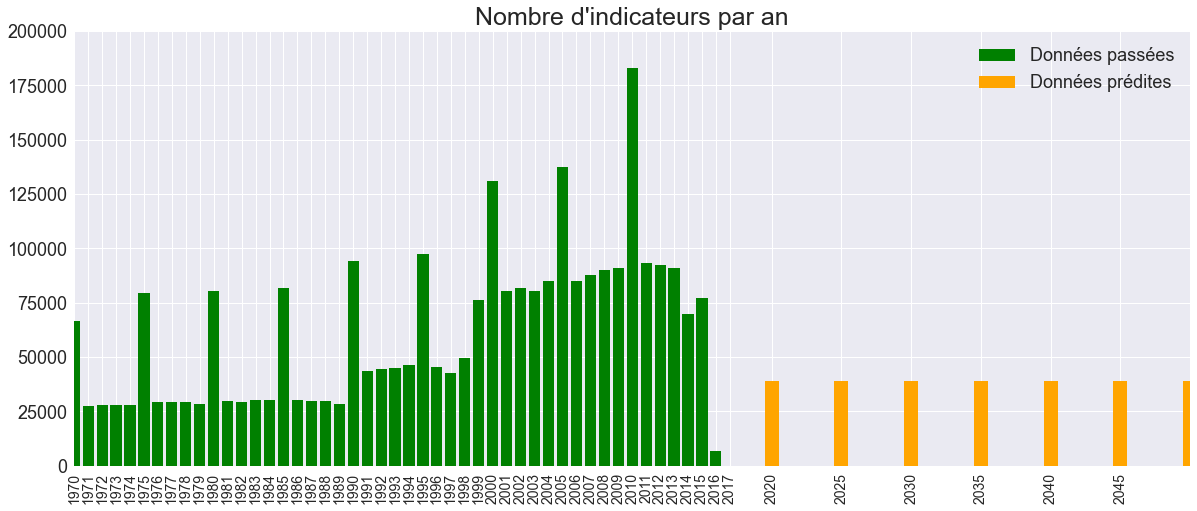

In [186]:
fig = plt.figure(figsize=(20,8))
plt.title("Nombre d'indicateurs par an", fontsize=25)
plt.axis([1970, 2050, 0, 200000])

plt.bar(years_past, counts_past, color='g', label='Données passées')
plt.bar(years_future, counts_future, color='orange', width=1, label='Données prédites')
plt.xticks(years[years < 2050], rotation=90, fontsize=14)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

Pas de données sures après 2017. Les predicitions ont commencées en 2020. On voit que beaucoup d'indicateurs ne sont rensignés que tous les 5 ans, tout comme les prédictions

### Afin de faire une première sélection des pays. Nous allons regarder dans quels pays l'accès à internet est assuré

In [116]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [117]:
data = data.rename(columns={'Indicator Name_x': 'Indicator_name'})

In [118]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator_name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [119]:
indicateurs_internet = []
indicateurs = data['Long definition'].unique()
for indicateur in indicateurs:
    mots = indicateur.split(' ')
    if 'online' in [mot.lower() for mot in mots]:
        indicateurs_internet.append(indicateur)
len(indicateurs_internet)

0

In [120]:
indicateurs_internet = []
indicateurs = data['Long definition'].unique()
for indicateur in indicateurs:
    mots = indicateur.split(' ')
    if 'internet' in mots:
        indicateurs_internet.append(indicateur)
len(indicateurs_internet)

0

Aucun indicateur ne parle d'accès à internet...

### En l'absence d'informations sur l'accès à internet. Nous allons regarder les pays ou la population jeune augmente